In [1]:
import random,math,copy,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from tqdm import tqdm
import time
from sklearn.model_selection import GridSearchCV

C:\Users\SONAL BANSAL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
m=20  # Problem dimension (number of decision variables
Ap=0.1  # Awareness probability
fl=2   # Flight length (fl)
wf=1.2# wf is used to control the importance of classification accuracy and number of selected features.

In [3]:
df=pd.read_csv("AD-CN.csv")
df = df.dropna(how='all')

In [4]:
# df=df.drop(columns=['Unnamed: 0'])
df.head()

,label,0,1,2,3,4,5,6,7,8,...,67590,67591,67592,67593,67594,67595,67596,67597,67598,67599
0,0,55,56,57,57,57,57,56,55,56,...,59,59,59,59,59,59,60,59,58,57
1,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Columns: 67601 entries, label to 67599
dtypes: int64(67601)
memory usage: 626.7 MB


In [6]:
val_Data = pd.read_csv("AD-CN_val.csv")
val_Data = val_Data.dropna(how='all')
#val_Data=val_Data.drop(columns=['Unnamed: 0'])

In [7]:
val_Data.head()

,label,0,1,2,3,4,5,6,7,8,...,67590,67591,67592,67593,67594,67595,67596,67597,67598,67599
0,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
1,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255


In [8]:
val_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Columns: 67601 entries, label to 67599
dtypes: int64(67601)
memory usage: 163.0 MB


In [9]:
features = [i for i in range(0,67600)]

In [10]:
d=67600# Flock (population) size
lt=67600
y_train=df['label']
x_train=df[df.columns[1:]]
x_train.columns=features

In [11]:
y_test = val_Data['label']
x_test = val_Data[val_Data.columns[1:]]
x_test.columns=features

## WITHOUT GRID-SEARCH AND WITHOUT BIO-INSPIRED

In [12]:
print(time.time())

neigh1 = KNeighborsClassifier()
neigh1.fit(x_train, y_train)
neigh1.predict(x_test)
nacc1=neigh1.score(x_test,y_test)

print(nacc1)

#
rforest1 = RandomForestClassifier()
rforest1.fit(x_train, y_train)
rforest1.predict(x_test)
rfacc1=rforest1.score(x_test,y_test)

print(rfacc1)

#
dtree1 = tree.DecisionTreeClassifier()
dtree1.fit(x_train, y_train)
dtree1.predict(x_test)
dtacc1=dtree1.score(x_test,y_test)

print(dtacc1)

clf1 = svm.SVC()
clf1.fit(x_train, y_train)
clf1.predict(x_test)
clfacc1=clf1.score(x_test,y_test)

print(clfacc1)


1553614112.9530687
0.7626582278481012
0.7658227848101266
0.7468354430379747
0.9272151898734177


In [13]:
im=(rforest1.feature_importances_)
print(im)

[0. 0. 0. ... 0. 0. 0.]


In [14]:
imo=pd.Series()
for i in tqdm(range(d)):
    imo= imo.set_value(features[i],im[i])

  0%|                                                                                        | 0/67600 [00:00<?, ?it/s]C:\Users\SONAL BANSAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
100%|███████████████████████████████████████████████████████████████████████████| 67600/67600 [07:20<00:00, 153.40it/s]


In [20]:
imo.to_csv('importance_feature_AD-CN.csv')
len(imo)

67600

## WITH GRID-SEARCH WITHOUT BIO-INSPIRED

In [ ]:
rfparams = {'n_estimators':[10,100,200,300,400,500], 'criterion':['gini','entropy'], 'max_depth':[10,20,30], 'min_samples_split':[5,10,20], 'min_samples_leaf':[2,4,6]}
grid_rf = GridSearchCV(rforest1, rfparams, verbose=2)
grid_rf.fit(x_train, y_train)
grid_rf.predict(x_test)
print(grid_rf.best_score_)
print(grid_rf.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=  12.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   4.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   4.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=  16.5s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=  20.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, tot

[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  18.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  27.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  37.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  35.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estim

[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  31.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  37.7s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  41.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=  37.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estim

[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total=  58.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total=  55.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500, total=  53.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500, total= 1.2min
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500,

[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=20, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=20, n_estimators=500, total=  51.2s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   3.4s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   3.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   3.7s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100, tot

[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  10.4s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  21.4s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  16.7s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  22.9s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estim

In [ ]:
dtparams = {'criterion':['gini', 'entropy'], 'splitter':['best','random'], 'max_depth':[10,20,30], 'min_samples_split':[5,10,20], 'min_samples_leaf':[2,4,6]}
grid_dt = GridSearchCV(dtree1, dtparams, verbose=2)
grid_dt.fit(x_train, y_train)
grid_dt.predict(x_test)
print(grid_dt.best_score_)
print(grid_dt.best_params_)


In [ ]:
svcparams = {'C':[1.0,10,100,1000], 'kernel':['rbf','linear', 'poly', 'sigmoid'], 'degree':[3,4,5], 'gamma':['auto',0.1,0.01,0.001]}
grid_svc = GridSearchCV(clf1, svcparams, verbose=2)
grid_svc.fit(x_train, y_train)
grid_svc.predict(x_test)
print(grid_svc.best_score_)
print(grid_svc.best_params_)

In [ ]:
knnparams = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_neighbors':[3, 4, 5, 6, 7], 'leaf_size':[10, 20, 30, 40], 'p':[1, 2, 3]}
grid_knn = GridSearchCV(neigh1, knnparams, verbose=2)
grid_knn.fit(x_train, y_train)
grid_knn.predict(x_test)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

In [17]:
def init():   #initialization function
    df2=pd.DataFrame(np.ones((m,d),dtype='int'),columns=features)
    return df2
#df2=init()

## FITNESS FUNCTION

In [18]:
# this defines the fitness of each crow by calculating their accuracy and no features selected using the below formula
def fitness(df2):      # fitness function whose 1 parameter takes the crows and their position as input
    fnt=np.zeros((m,1))  # fnt is the fitness function
    for k in tqdm(range(m)):    
        global sel
        sel=[]
        q=0
        imp=0
        a=(df2.iloc[k,:])==0.0
        if a.all()==True:
            df2.iloc[k,:]=1.0
        for p in list(features):
            if df2.loc[k,p]==1.0:
                sel.insert(q,p)
                temp=imo[p]
                imp=imp+temp
            q=q+1
        lf=len(sel)
        divide=lf/lt
        fnt[k]=imp+wf*(1-float(lf/lt))     # fitness formula
    return fnt


In [19]:
z=init()   #crow memory with initial position
tmax=50   # Maximum number of iterations (itermax)
xn=z.copy()  # the position of the crow
mem=init()  # memory is initialized using the init function
xnew=(xn).copy()   # the positions of the crow
ft=fitness(xn)
plotit=[]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:39<00:00,  4.98s/it]


## FEATURES IMPORTANCE

In [22]:
tottime=0
# it is a formula to convert positions of each crow into 0 and 1 
for t in range(tmax):
    print(t)# no of iterations
    time1=time.time()
   
    xnew_list = []
    plotit.append(ft.max())
    num = random.randint(0,m-1)  
   # Generation of random candidate crows for following (chasing)
    for i in tqdm(range(m)):   
       
        r=random.random()
        if r>=Ap:
            
            xnew_list.append((xn.loc[i,:]+fl*r*(mem.loc[num,:]-xn.loc[i,:])).tolist())# Generation of a new position for crow i (state 1)
            
        else:
            
            xnew_list.append((xnew.loc[i,:].apply(lambda lam:random.random())).tolist())   # Generation of a new position for crow i (state 2)
            
            
    xnew = pd.DataFrame(xnew_list)
    del xnew_list
    print('transpose')
    xnew= 1/( 1 + np.expm1(( 10*(xnew-0.5))))    #  formula to convert positions of each crow into 0 and 1
    print('exp')
    xnew=xnew.apply(lambda l:l>=random.random()).astype(int)
    print('apply lambda')
    xn=xnew.copy()     
    print('copied')
    # it is the updated binary position of each crow
    #feasibility test
    # this is done so that to check if atleast one position of the crow has value equal to 1. if it is not true then every
    # position value of the crow is made 1.
    for i in tqdm(range(m)):
        
        if ((xn.loc[i,:])==0.0).all()==True:
            xn.loc[i,:]=1.0
    
    print('running fitness')
    ft_new=fitness(xn).reshape(ft.shape)# here the accuracy of each crows are calculated.

    print('fitness done')
    for i in tqdm(range(m)):
         
        if ft_new[i]>ft[i]:
            ft[i]=ft_new[i]
            for j in features:
                mem.loc[i,j]= xn.loc[i,j]
    
    print('complete'+str(t))
    time2=time.time()
    tottime=tottime+(time2-time1)
print(tottime/t+1)


0



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 32.50it/s]

transpose
exp


KeyboardInterrupt: 

## WITHOUT GRID SEARCH , WITH BIO-INSPIRED

In [23]:
# here the accuracy of each crows are calculated.
neigh2 = KNeighborsClassifier()
rforest2 =RandomForestClassifier()
dtree2 = tree.DecisionTreeClassifier()
clf2 = svm.SVC()

nacc2=np.zeros((m,1),dtype='float64')
rfacc2=np.zeros((m,1),dtype='float64')
dtacc2=np.zeros((m,1),dtype='float64')
clfacc2=np.zeros((m,1),dtype='float64')

q=0
for i in tqdm(range(m)):
    print(i)
    select=[]
    for p in list(features):
        if mem.loc[i,p]==1:
            select.insert(q,p)
            q=q+1
    neigh2.fit(x_train[select], y_train)
    neigh2.predict(x_test[select])
    nacc2[i]=neigh2.score(x_test[select],y_test) 
    print(nacc2[i])
    
    rforest2.fit(x_train[select], y_train)
    rforest2.predict(x_test[select])
    rfacc2[i]=rforest2.score(x_test[select],y_test) 
    print(rfacc2[i])
    
    dtree2.fit(x_train[select], y_train)
    dtree2.predict(x_test[select])
    dtacc2[i]=dtree2.score(x_test[select],y_test)
    print(dtacc2[i])
    
    clf2.fit(x_train[select], y_train)
    clf2.predict(x_test[select])
    clfacc2[i]=clf2.score(x_test[select],y_test)
    print(clfacc2[i])

print (nacc2.max(), rfacc2.max(), dtacc2.max(),clfacc2.max()) # the crow with maximum accuracy is printed


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

0
[0.73101266]
[0.78164557]
[0.76582278]
[0.92721519]



  5%|████▏                                                                              | 1/20 [00:20<06:35, 20.80s/it]

1
[0.73101266]
[0.73734177]
[0.77531646]
[0.92721519]



 10%|████████▎                                                                          | 2/20 [00:31<04:45, 15.85s/it]

2
[0.73101266]
[0.73734177]
[0.76898734]
[0.92721519]



 15%|████████████▍                                                                      | 3/20 [00:42<04:02, 14.25s/it]

3
[0.75632911]
[0.73734177]
[0.73734177]
[0.92721519]



 20%|████████████████▍                                                                 | 4/20 [07:57<31:49, 119.31s/it]

4
[0.73101266]
[0.75949367]
[0.76898734]
[0.92721519]



 25%|████████████████████▊                                                              | 5/20 [08:08<24:25, 97.71s/it]

5
[0.73101266]
[0.74050633]
[0.76582278]
[0.92721519]



 30%|████████████████████████▉                                                          | 6/20 [08:19<19:25, 83.27s/it]

6
[0.75949367]
[0.75316456]
[0.75316456]
[0.92721519]



 35%|████████████████████████████▋                                                     | 7/20 [16:24<30:27, 140.58s/it]

7
[0.73101266]
[0.75949367]
[0.76898734]
[0.92721519]



 40%|████████████████████████████████▊                                                 | 8/20 [16:36<24:54, 124.57s/it]

8
[0.73101266]
[0.7056962]
[0.78481013]
[0.92721519]



 45%|████████████████████████████████████▉                                             | 9/20 [16:46<20:30, 111.88s/it]

9
[0.74050633]
[0.79113924]
[0.77848101]
[0.92721519]



 50%|████████████████████████████████████████▌                                        | 10/20 [25:22<25:22, 152.27s/it]

10
[0.73101266]
[0.78164557]
[0.75949367]
[0.92721519]



 55%|████████████████████████████████████████████▌                                    | 11/20 [25:34<20:55, 139.51s/it]

11
[0.73101266]
[0.72468354]
[0.77848101]
[0.92721519]



 60%|████████████████████████████████████████████████▌                                | 12/20 [25:45<17:10, 128.79s/it]

12
[0.73101266]
[0.71202532]
[0.78164557]
[0.92721519]



 65%|████████████████████████████████████████████████████▋                            | 13/20 [25:55<13:57, 119.64s/it]

13
[0.73101266]
[0.74050633]
[0.7721519]
[0.92721519]



 70%|████████████████████████████████████████████████████████▋                        | 14/20 [26:04<11:10, 111.78s/it]

14
[0.73101266]
[0.76898734]
[0.76898734]
[0.92721519]



 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [26:14<08:44, 105.00s/it]

15
[0.73101266]
[0.7721519]
[0.77848101]
[0.92721519]



 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [26:24<06:36, 99.02s/it]

16
[0.73101266]
[0.76265823]
[0.76582278]
[0.92721519]



 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [26:34<04:41, 93.77s/it]

17
[0.73101266]
[0.76582278]
[0.78797468]
[0.92721519]



 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [26:43<02:58, 89.10s/it]

18
[0.75632911]
[0.75316456]
[0.79746835]
[0.92721519]



 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [37:49<01:59, 119.44s/it]

19
[0.73101266]
[0.76582278]
[0.76582278]
[0.92721519]



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [38:00<00:00, 114.01s/it]


0.759493670886076 0.7911392405063291 0.7974683544303798 0.9272151898734177


**SELECTED FEATURED**

In [25]:
print ((mem.loc[nacc1.argmax(),:]==1.0).sum())

print ((mem.loc[rfacc1.argmax(),:]==1.0).sum())
print ((mem.loc[dtacc1.argmax(),:]==1.0).sum())
print ((mem.loc[clfacc1.argmax(),:]==1.0).sum())

449
449
449
449


In [26]:
plotse=pd.Series(plotit)
print(plotit)

[0.9999999999999996, 1.1951512994668654, 1.1951512994668654, 1.1951512994668654]


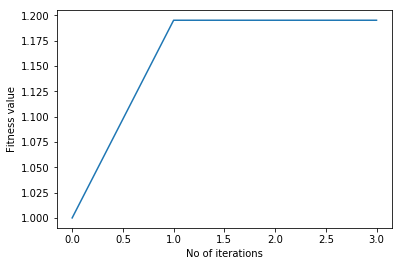

In [27]:
plt.plot(plotse)
plt.xlabel('No of iterations')
plt.ylabel('Fitness value')
plt.show()

In [29]:
mem.to_csv('memory_AD-CN.csv')